In [ ]:
## keras tut

In [42]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
# fix random seed for reproducibility
numpy.random.seed(7)
import matplotlib.pyplot as plt


In [38]:
dataset = np.loadtxt("data.csv", delimiter=",")

In [24]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]


(768,)

In [8]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 0s 551us/step - loss: 3.7096 - acc: 0.5977
Epoch 2/150
768/768 [==============================] - 0s 168us/step - loss: 0.9372 - acc: 0.5911
Epoch 3/150
768/768 [==============================] - 0s 153us/step - loss: 0.7478 - acc: 0.6432
Epoch 4/150
768/768 [==============================] - 0s 155us/step - loss: 0.7120 - acc: 0.6549
Epoch 5/150
768/768 [==============================] - 0s 148us/step - loss: 0.6842 - acc: 0.6680
Epoch 6/150
768/768 [==============================] - 0s 161us/step - loss: 0.6522 - acc: 0.6784
Epoch 7/150
768/768 [==============================] - 0s 157us/step - loss: 0.6504 - acc: 0.6810
Epoch 8/150
768/768 [==============================] - 0s 143us/step - loss: 0.6388 - acc: 0.6862
Epoch 9/150
768/768 [==============================] - 0s 142us/step - loss: 0.6243 - acc: 0.6953
Epoch 10/150
768/768 [==============================] - 0s 144us/step - loss: 0.6309 - acc: 0.6784
Epoch 11/150
768/76

768/768 [==============================] - 0s 162us/step - loss: 0.5015 - acc: 0.7591
Epoch 84/150
768/768 [==============================] - 0s 153us/step - loss: 0.4980 - acc: 0.7604
Epoch 85/150
768/768 [==============================] - 0s 167us/step - loss: 0.5057 - acc: 0.7500
Epoch 86/150
768/768 [==============================] - 0s 150us/step - loss: 0.5076 - acc: 0.7487
Epoch 87/150
768/768 [==============================] - 0s 153us/step - loss: 0.4991 - acc: 0.7591
Epoch 88/150
768/768 [==============================] - 0s 172us/step - loss: 0.5010 - acc: 0.7656
Epoch 89/150
768/768 [==============================] - 0s 169us/step - loss: 0.5039 - acc: 0.7708
Epoch 90/150
768/768 [==============================] - 0s 175us/step - loss: 0.5091 - acc: 0.7552
Epoch 91/150
768/768 [==============================] - 0s 175us/step - loss: 0.4991 - acc: 0.7604
Epoch 92/150
768/768 [==============================] - 0s 159us/step - loss: 0.5057 - acc: 0.7513
Epoch 93/150
768/768 [=

In [11]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 58us/step

acc: 77.86%


In [32]:
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
#print(rounded)

In [1]:
from sklearn import datasets


In [35]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [3]:
(moon_x,moon_y) = datasets.make_moons(n_samples=10000, noise=0.05, random_state=42)
(circle_x,circle_y) = datasets.make_circles(n_samples=10000, noise=0.025, random_state=42)

For each dataset, plot the data in 2 dimensions, and also show the decision boundaries of your network (for example, produce a visualization 
like: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html).
Make note of your final accuracy on the training dataset, and the cross entropy score as well.

In [33]:
def nn (X, Y):
    model = Sequential()
    model.add(Dense(12, input_dim=2, init='uniform', activation='relu'))
    model.add(Dense(8, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
      
    # Fit the model
    model.fit(X, Y, epochs=150, batch_size=10,  verbose=2)
    # calculate predictions
    predictions = model.predict(X)
    
    scores = model.evaluate(X, Y)
    return ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



In [34]:
nn(moon_x,moon_y)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=2, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


Epoch 1/150
 - 2s - loss: 0.3383 - acc: 0.8525
Epoch 2/150
 - 1s - loss: 0.2105 - acc: 0.8940
Epoch 3/150
 - 1s - loss: 0.2036 - acc: 0.8936
Epoch 4/150
 - 1s - loss: 0.2021 - acc: 0.8950
Epoch 5/150
 - 1s - loss: 0.2022 - acc: 0.8960
Epoch 6/150
 - 1s - loss: 0.2020 - acc: 0.8952
Epoch 7/150
 - 1s - loss: 0.2022 - acc: 0.8946
Epoch 8/150
 - 1s - loss: 0.2015 - acc: 0.8956
Epoch 9/150
 - 1s - loss: 0.2017 - acc: 0.8955
Epoch 10/150
 - 1s - loss: 0.2012 - acc: 0.8950
Epoch 11/150
 - 1s - loss: 0.2017 - acc: 0.8935
Epoch 12/150
 - 1s - loss: 0.2014 - acc: 0.8961
Epoch 13/150
 - 1s - loss: 0.2010 - acc: 0.8950
Epoch 14/150
 - 1s - loss: 0.2013 - acc: 0.8952
Epoch 15/150
 - 1s - loss: 0.2015 - acc: 0.8954
Epoch 16/150
 - 1s - loss: 0.2016 - acc: 0.8957
Epoch 17/150
 - 1s - loss: 0.2016 - acc: 0.8949
Epoch 18/150
 - 1s - loss: 0.2012 - acc: 0.8964
Epoch 19/150
 - 1s - loss: 0.2013 - acc: 0.8983
Epoch 20/150
 - 1s - loss: 0.2014 - acc: 0.8963
Epoch 21/150
 - 1s - loss: 0.2011 - acc: 0.8953
E

'\nacc: 100.00%'

In [ ]:
#### first trial

In [40]:
# fig, sub = plt.subplots(3, 2)
# plt.subplots_adjust(wspace=0.4, hspace=0.8)

X,Y = moon_x,moon_y
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

model = Sequential()
model.add(Dense(12, input_dim=2, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2)
    
plot_contours(plt, clf, xx, yy,
              cmap='viridis', alpha=0.8)


plt.scatter(X0, X1, c=Y, cmap='viridis', s=5, linewidths=0)

plt.set_xlim(xx.min(), xx.max())
plt.set_ylim(yy.min(), yy.max())
plt.set_xticks(())
plt.set_yticks(())
plt.set_title('model')

plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=2, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/150
 - 2s - loss: 0.3656 - acc: 0.8467
Epoch 2/150
 - 1s - loss: 0.2415 - acc: 0.8879
Epoch 3/150
 - 2s - loss: 0.2401 - acc: 0.8883
Epoch 4/150
 - 2s - loss: 0.2395 - acc: 0.8883
Epoch 5/150
 - 2s - loss: 0.2402 - acc: 0.8888
Epoch 6/150
 - 2s - loss: 0.2396 - acc: 0.8881
Epoch 7/150
 - 1s - loss: 0.2396 - acc: 0.8881
Epoch 8/150
 - 1s - loss: 0.2395 - acc: 0.8899
Epoch 9/150
 - 1s - loss: 0.2391 - acc: 0.8880
Epoch 10/150
 - 1s - loss: 0.2392 - acc: 0.8887
Epoch 11/150
 - 1s - loss: 0.2395 - acc: 0.8874
Epoch 12/150
 - 1s - loss: 0.2394 - acc: 0.8889
Epoch 13/150
 - 1s - loss: 0.2395 - acc: 0.8889
Epoch 14/150
 - 1s - loss: 0.2391 - acc: 0.8888
Epoch 15/150
 - 1s - loss: 0.2395 - acc: 0.8887
Epoch 16/150
 - 1s - loss: 0.2396 - acc: 0.8887
Epoch 17/150
 - 1s - loss: 0.2395 - acc: 0.8878
Epoch 18/150
 - 1s - loss: 0.2392 - acc: 0.8880
Epoch 19/150
 - 1s - loss: 0.2396 - acc: 0.8877
Epoch 20/150
 - 1s - loss: 0.2392 - acc: 0.8892
Epoch 21/150
 - 1s - loss: 0.2391 - acc: 0.8878
E

NameError: name 'ax' is not defined

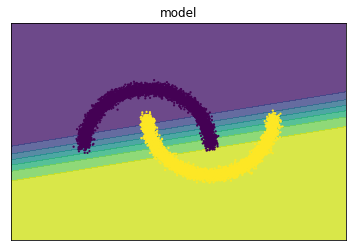

In [45]:
plot_contours(plt, model, xx, yy,
              cmap='viridis', alpha=0.8)


plt.scatter(X0, X1, c=Y, cmap='viridis', s=5, linewidths=0)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('model')

plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(2,), activation="sigmoid", units=5, kernel_initializer="glorot_uniform")`
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=5, kernel_initializer="glorot_uniform")`
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
/usr/local/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
10000/10000 [==============================] - 1s 104us/step - loss: 0.6140
Epoch 2/100
10000/10000 [==============================] - 1s 53us/step - loss: 0.4459
Epoch 3/100
10000/10000 [==============================] - 1s 51us/step - loss: 0.3293
Epoch 4/100
10000/10000 [==============================] - 0s 49us/step - loss: 0.2775
Epoch 5/100
10000/10000 [==============================] - 1s 53us/step - loss: 0.2586
Epoch 6/100
10000/10000 [==============================] - 0s 49us/step - loss: 0.2522
Epoch 7/100
10000/10000 [==============================] - 1s 51us/step - loss: 0.2504: 0s - loss: 0
Epoch 8/100
10000/10000 [==============================] - 1s 51us/step - loss: 0.2499
Epoch 9/100
10000/10000 [==============================] - 1s 52us/step - loss: 0.2493
Epoch 10/100
10000/10000 [==============================] - 1s 59us/step - loss: 0.2491
Epoch 11/100
10000/10000 [==============================] - 1s 59us/step - loss: 0.2486
Epoch 12/100
10000/10000 [

10000/10000 [==============================] - 1s 97us/step - loss: 0.0026
Epoch 92/100
10000/10000 [==============================] - 1s 79us/step - loss: 0.0025
Epoch 93/100
10000/10000 [==============================] - 1s 88us/step - loss: 0.0024
Epoch 94/100
10000/10000 [==============================] - 1s 82us/step - loss: 0.0024
Epoch 95/100
10000/10000 [==============================] - 1s 94us/step - loss: 0.0023: 0s - loss:
Epoch 96/100
10000/10000 [==============================] - 1s 82us/step - loss: 0.0023
Epoch 97/100
10000/10000 [==============================] - 1s 71us/step - loss: 0.0022
Epoch 98/100
10000/10000 [==============================] - 1s 71us/step - loss: 0.0022
Epoch 99/100
10000/10000 [==============================] - 1s 75us/step - loss: 0.0021
Epoch 100/100
10000/10000 [==============================] - 1s 73us/step - loss: 0.0021


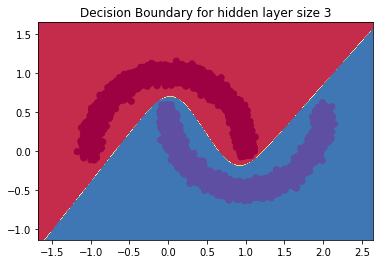

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model as plot
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD


import  numpy as np
import  matplotlib.pyplot as plt

import  sklearn
from sklearn import datasets, linear_model

X,Y = moon_x,moon_y

# Build model
model = Sequential()
# kwarg dict for convenience
layer_kw = dict(activation='sigmoid', init='glorot_uniform')

# Add layers to our model
model.add(Dense(output_dim=5, input_shape=(2, ), **layer_kw))
model.add(Dense(output_dim=5, **layer_kw))
model.add(Dense(output_dim=1, **layer_kw))

sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# Train

model.fit(X, Y, nb_epoch=100)

# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)

# Predict and plot
plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=200))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()